In [15]:
#Has to be run twice most of the time (restart runtime inbetween)
!apt-get -qq install -y libspatialindex-dev
!pip install osmnx
!pip install geopandas

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x231fc906860>
C:\Python\Python3.10\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Python\Python3.10\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Python\Python3.10\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x231fc9075e0>
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x231fc9076a0>



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x231fc907760>


In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import folium
import requests
from folium.plugins import MarkerCluster
from xml.etree import ElementTree
import folium.vector_layers
from sklearn.cluster import KMeans



#ox.config(use_cache=True, log_console=True)

In [17]:
place_name = "Würzburg, Bavaria, Germany"
gdf = ox.geometries_from_place(place_name, {'building': True})

In [18]:
#save the centroid of every polygon in longitude and latitude

###############################  OLD CODE ###########################
# gdf["latitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)
# gdf["longitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)


gdf["latitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)
gdf["longitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

gdf["name"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)

gdf["barrier"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

gdf["entrance"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

# gdf["newPoint"] = gdf.applymap(lambda row: row.geometry.centroid)
gdf

created_by  \
element_type osmid                   
node         339407734         NaN   
             477372238         NaN   
             664745957         NaN   
             1129511142        NaN   
             1129511162        NaN   
...                            ...   
relation     14750334          NaN   
             14784447          NaN   
             14933987          NaN   
             14964888          NaN   
             16008231          NaN   

                                                                  geometry  \
element_type osmid                                                           
node         339407734                            POINT (9.96339 49.81608)   
             477372238                            POINT (9.94901 49.77581)   
             664745957                            POINT (9.91686 49.79138)   
             1129511142                           POINT (9.97739 49.81209)   
             1129511162                           POINT (9.97707 49.81179)   
...                                                                    ...   
relation     14750334    MULTIPOLYGON (((9.92724 49.79198, 9.92724 49.7...   
             14784447    POLYGON ((9.92386 49.80047, 9.92387 49.80046, ...   
             14933987    POLYGON ((9.93106 49.79123, 9.93121 49.79123, ...   
             14964888    POLYGON ((9.95537 49.80114, 9.95538 49.80115, ...   
             16008231    POLYGON ((9.92980 49.79982, 9.92993 49.79949, ...   

                          entrance      name    barrier access amenity  fee  \
element_type osmid                                                            
node         339407734   49.816082  9.963393  49.816082    NaN    fuel  NaN   
             477372238   49.775814  9.949010  49.775814    NaN     NaN  NaN   
             664745957   49.791382  9.916865  49.791382    NaN     NaN  NaN   
             1129511142  49.812095  9.977388  49.812095    NaN     NaN  NaN   
             1129511162  49.811791  9.977067  49.811791    NaN     NaN  NaN   
...                            ...       ...        ...    ...     ...  ...   
relation     14750334    49.791933  9.927445  49.791933    NaN     NaN  NaN   
             14784447    49.800289  9.924002  49.800289    NaN     NaN  NaN   
             14933987    49.791000  9.930920  49.791000    NaN     NaN  NaN   
             14964888    49.800937  9.955610  49.800937    NaN     NaN  NaN   
             16008231    49.799595  9.929585  49.799595    NaN     NaN  NaN   

                             opening_hours parking  ... name:cs name:da  \
element_type osmid                                  ...                   
node         339407734   Mo-Su 08:00-22:00     NaN  ...     NaN     NaN   
             477372238                 NaN     NaN  ...     NaN     NaN   
             664745957                 NaN     NaN  ...     NaN     NaN   
             1129511142                NaN     NaN  ...     NaN     NaN   
             1129511162                NaN     NaN  ...     NaN     NaN   
...                                    ...     ...  ...     ...     ...   
relation     14750334                  NaN     NaN  ...     NaN     NaN   
             14784447                  NaN     NaN  ...     NaN     NaN   
             14933987                  NaN     NaN  ...     NaN     NaN   
             14964888                  NaN     NaN  ...     NaN     NaN   
             16008231                  NaN     NaN  ...     NaN     NaN   

                        name:hu name:ja name:pl ref:whc          type  \
element_type osmid                                                      
node         339407734      NaN     NaN     NaN     NaN           NaN   
             477372238      NaN     NaN     NaN     NaN           NaN   
             664745957      NaN     NaN     NaN     NaN           NaN   
             1129511142     NaN     NaN     NaN     NaN           NaN   
             1129511162     NaN     NaN     NaN     NaN           NaN   

In [19]:
import statistics
f=statistics.mean(gdf["latitude"])
h = statistics.mean(gdf["longitude"])
print(f)
print(h)


print(gdf.columns)
print(gdf["name"])

# df[gdf('geometry')]= df[gdf('geometry')].astype('|S80')

# # name = gdf["name"]
# print(gdf["geometry"].type)
# # print(name)


9.948052518883637
49.78721553579259
Index(['created_by', 'geometry', 'entrance', 'name', 'barrier', 'access',
       'amenity', 'fee', 'opening_hours', 'parking',
       ...
       'name:cs', 'name:da', 'name:hu', 'name:ja', 'name:pl', 'ref:whc',
       'type', 'whc:inscription_date', 'latitude', 'longitude'],
      dtype='object', length=403)
element_type  osmid     
node          339407734     9.963393
              477372238     9.949010
              664745957     9.916865
              1129511142    9.977388
              1129511162    9.977067
                              ...   
relation      14750334      9.927445
              14784447      9.924002
              14933987      9.930920
              14964888      9.955610
              16008231      9.929585
Name: name, Length: 30947, dtype: float64


In [20]:
data = pd.DataFrame({
    'lon': gdf["longitude"].values,
    'lat': gdf["latitude"].values,
#     'name' : gdf["name"].values

 },
#     dtype=str
)

print(len(data))
locations = data[['lat', 'lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[3]



# m = folium.Map(location=[f,h], tiles="OpenStreetMap", zoom_start=10)

# marker_cluster = folium.MarkerCluster().add_to(map2)

# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point], popup=data['Name'][point]).add_to(marker_cluster)
# map2


30947


[9.9773878, 49.8120946]

In [21]:
#############  FINAL CODE 2 WITH SENSOR CLUSTERS WITH DIFFERENT COLORS UNDER EACH GATEWAY ##############


import pandas as pd
import folium
from sklearn.cluster import KMeans

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('sensors0.csv', delimiter=";") # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Limit the number of sensors and gateways
max_sensors = 100
max_gateways = min(max_sensors, len(sensor_data))

# Limit the sensor data to the first 'max_sensors' rows
sensor_data = sensor_data.head(max_sensors)

# Limit the gateway data to the first 'max_gateways' rows
gateway_df = gateway_df.head(max_gateways)

# Create a DataFrame with sensor coordinates
data = pd.DataFrame({
    'lon': sensor_data["lon"].values,
    'lat': sensor_data["lat"].values,
}, dtype=float)  # Convert to float

locations = data[['lon', 'lat']]
locationlist = locations.values.tolist()

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(locationlist)
gateway_coords = kmeans.cluster_centers_

# Create a folium map centered on the first gateway location
map_center = gateway_coords[0]
m = folium.Map(location=map_center, tiles='OpenStreetMap', zoom_start=10)

# Initialize a dictionary to store sensor clusters under each gateway
gateway_clusters = {i: [] for i in range(n_clusters)}

# Assign sensors to their respective gateway clusters
labels = kmeans.labels_
for sensor_idx, cluster_idx in enumerate(labels):
    gateway_clusters[cluster_idx].append(sensor_idx)

# Add the sensor markers to the map with cluster colors
cluster_colors = ['darkpurple', 'pink', 'beige', 'darkblue', 'darkgreen', 'darkred', 'red', 'gray', 'cadetblue', 'orange', 'lightblue', 'blue', 'lightred', 'lightgray', 'lightgreen', 'black', 'green', 'white', 'purple']  # Extended list
for cluster_idx, sensor_indices in gateway_clusters.items():
    for sensor_idx in sensor_indices:
        # Use sensor_data DataFrame here instead of gdf
        sensor = sensor_data.iloc[sensor_idx]
        folium.Marker(location=[sensor['lon'], sensor['lat']], icon=folium.Icon(color=cluster_colors[cluster_idx])).add_to(m)

# Add the gateway markers to the map with sensor counts
for i, coord in enumerate(gateway_coords):
    sensor_count = len(gateway_clusters[i])
    folium.Marker(location=[coord[0], coord[1]], icon=folium.Icon(color='red'), popup=f'Sensors: {sensor_count}').add_to(m)

# Display the map
m.save('mapnew44.html')

# Display the latitude and longitude coordinates in a table
print("Sensor Coordinates:")
print(sensor_data[['lat', 'lon']])

# Save sensor coordinates to a CSV file
sensor_data[['lat', 'lon']].to_csv('sensor_coordinates2.csv', index=False)


C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sensor Coordinates:
         lat        lon
0   9.921848  49.768853
1   9.909365  49.801926
2   9.988255  49.811112
3   9.928287  49.788420
4   9.889557  49.809535
..       ...        ...
95  9.969799  49.822325
96  9.902671  49.798504
97  9.942094  49.791134
98  9.929537  49.796087
99  9.931195  49.790207

[100 rows x 2 columns]


In [22]:
# #################   FINAL  #################################################################

# ############  Calculate signal strength for each sensor (based on correct FSPL formula) ##################
import pandas as pd
import math

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('sensors0.csv', delimiter=";")

# Limit the sensor data to the first 100 rows
sensor_data = sensor_data.head(100)

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# Get the coordinates of the cluster centers (gateway locations)
gateway_coords = kmeans.cluster_centers_

print(gateway_coords)

# Calculate distance for each sensor from the first gateway
sensor_data['distance_meters'] = sensor_data.apply(
    lambda row: math.sqrt((row['lon'] - gateway_coords[0][1])**2 + (row['lat'] - gateway_coords[0][0])**2),
    axis=1
)

# Constants for signal strength calculation
frequency = 915e6  # Frequency in Hz
transmitter_power_dbm = 20  # Transmitter power in dBm
transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# Calculate signal strength for each sensor based on path loss
sensor_data['signal_strength_dbm'] = sensor_data.apply(
    lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - (20 * math.log10(frequency) + 20 * math.log10(row['distance_meters']) + 32.45),
    axis=1
)

print(sensor_data[['lon', 'lat', 'distance_meters', 'signal_strength_dbm']])




[[ 9.96685601 49.82057359]
 [ 9.93167142 49.76369669]
 [ 9.9665529  49.72088429]
 [ 9.92192699 49.81636185]
 [ 9.95063031 49.78142279]
 [ 9.98343217 49.80438612]
 [ 9.89886874 49.80070602]
 [ 9.95571818 49.74997537]
 [ 9.93015837 49.7867793 ]
 [ 9.94794689 49.79796989]
 [ 9.90228265 49.77312537]]
          lon       lat  distance_meters  signal_strength_dbm
0   49.768853  9.921848         0.068562          -162.400063
1   49.801926  9.909365         0.060440          -161.304862
2   49.811112  9.988255         0.023397          -153.061789
3   49.788420  9.928287         0.050214          -159.694940
4   49.809535  9.889557         0.078083          -163.529528
..        ...       ...              ...                  ...
95  49.822325  9.969799         0.003424          -136.370196
96  49.798504  9.902671         0.067873          -162.312380
97  49.791134  9.942094         0.038469          -157.380665
98  49.796087  9.929537         0.044635          -158.672013
99  49.790207  9.931

C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
import folium

# Create a map centered around the first gateway
map_center = [gateway_coords[0][0], gateway_coords[0][1]]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each sensor with popup information
for index, row in sensor_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Signal Strength: {row['signal_strength_dbm']:.2f} dBm",
        icon=folium.Icon(color='blue')
    ).add_to(mymap)

# Add markers for gateway locations
for index, row in gateway_df.iterrows():
    folium.Marker(
        location=[row['longitude'], row['latitude']],
        popup=f"Gateway {index + 1}",
        icon=folium.Icon(color='red', icon='cloud')
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save('sensor_map.html')


In [23]:
# #################   FINAL (assigning SF to each sensor) ####################################################################

# Sort the sensor data in ascending order of signal strength
sorted_sensor_data = sensor_data.sort_values(by='signal_strength_dbm')

# Determine the number of sensors
num_sensors = len(sorted_sensor_data)

# Assign spreading factors (SF) based on signal strength thresholds
sf_values = [7, 8, 9, 10, 11, 12]  # SF values in increasing order

# Signal strength thresholds for SF assignment (you can adjust these thresholds)
thresholds = [-120.5 , -130.5, -140.5 , -150.5 , -160.50]

sf_assignment = []

# sf_idx = 0
for _, sensor in sorted_sensor_data.iterrows():
    sf_idx = 0
    while sf_idx < len(thresholds) and sensor['signal_strength_dbm'] < thresholds[sf_idx]:
        sf_idx += 1
    sf_assignment.append(sf_values[sf_idx])

# Add the spreading factor assignment to the sorted sensor data
sorted_sensor_data['spreading_factor'] = sf_assignment

# Print the sorted sensor data with assigned spreading factors
print(sorted_sensor_data[['lat', 'lon', 'signal_strength_dbm', 'spreading_factor']])

# Sort the sensor data and assign spreading factors as mentioned in the previous response

# Define the path to save the CSV file
output_csv_file = 'sensor_data_with_spreading_factors.csv'

# Save the sorted sensor data with assigned spreading factors to a CSV file
sorted_sensor_data.to_csv(output_csv_file, index=False)

print(f"Sensor data with assigned spreading factors saved to {output_csv_file}")



         lat        lon  signal_strength_dbm  spreading_factor
91  9.970376  49.716127          -166.061248                12
33  9.968036  49.719011          -165.813702                12
32  9.968755  49.719416          -165.779901                12
22  9.957010  49.720647          -165.714028                12
30  9.960714  49.722238          -165.549568                12
..       ...        ...                  ...               ...
36  9.966081  49.824147          -136.938979                 9
11  9.964848  49.817594          -136.787347                 9
95  9.969799  49.822325          -136.370196                 9
58  9.969187  49.820326          -133.076479                 9
20  9.966893  49.821169          -121.191162                 8

[100 rows x 4 columns]
Sensor data with assigned spreading factors saved to sensor_data_with_spreading_factors.csv


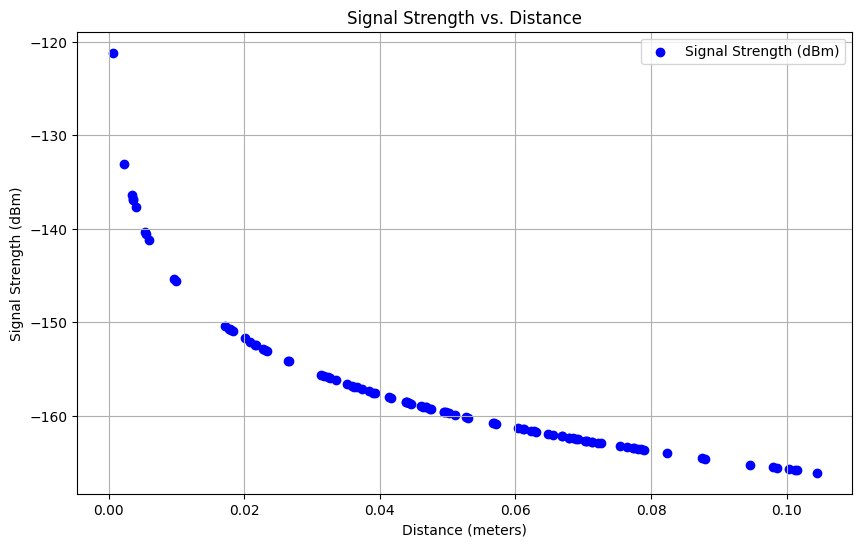

In [24]:
############ PLOT OF SIGNAL STRENGTH WRT DISTANCE  ###################################################

import matplotlib.pyplot as plt

# Assuming you have already calculated signal_strength_dbm and distance_meters

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sensor_data['distance_meters'], sensor_data['signal_strength_dbm'], c='b', marker='o', label='Signal Strength (dBm)')
plt.xlabel('Distance (meters)')
plt.ylabel('Signal Strength (dBm)')
plt.title('Signal Strength vs. Distance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [12]:
# # ############  Calculate signal strength for each sensor (RUN) ##################
# import pandas as pd
# import math

# # Load the CSV file with gateway coordinates
# gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# # Load the sensor data (replace this with your actual sensor data)
# sensor_data = pd.read_csv('sensors0.csv',delimiter=";")

# # Limit the sensor data to the first 100 rows
# sensor_data = sensor_data.head(100)

# # Specify the number of clusters (gateways) based on the CSV file
# n_clusters = len(gateway_df)

# # Perform K-means clustering to find the cluster centers (gateway locations)
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# # Get the coordinates of the cluster centers (gateway locations)
# gateway_coords = kmeans.cluster_centers_

# # Constants for signal strength calculation
# frequency = 915e6  # Frequency in Hz
# speed_of_light = 299792458  # Speed of light in m/s
# transmitter_power_dbm = 20  # Transmitter power in dBm
# transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
# receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# # Calculate free-space path loss
# free_space_path_loss_db = 20 * math.log10(4 * math.pi * frequency / speed_of_light)

# # Calculate distance for each sensor from the first gateway
# sensor_data['distance_meters'] = sensor_data.apply(
#     lambda row: math.sqrt((row['lon'] - gateway_coords[0][1])**2 + (row['lat'] - gateway_coords[0][0])**2),
#     axis=1
# )

# # Calculate signal strength for each sensor
# sensor_data['signal_strength_dbm'] = sensor_data.apply(
#     lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - free_space_path_loss_db - 20 * math.log10(row['distance_meters']),
#     axis=1
# )

# print(sensor_data['signal_strength_dbm'])

In [25]:
# Sort the sensor data in ascending order of signal strength (RUN)

sorted_sensor_data = sensor_data.sort_values(by='signal_strength_dbm')

# Determine the number of sensors
num_sensors = len(sorted_sensor_data)

# Assign spreading factors (SF) from 7 to 12 based on the signal strength
sf_values = [7, 8, 9, 10, 11, 12]
sf_per_sensor = num_sensors // len(sf_values)
sf_assignment = []

for i, sensor in enumerate(sorted_sensor_data.iterrows()):
    sf_idx = i // sf_per_sensor
    sf = sf_values[min(sf_idx, len(sf_values) - 1)]  # Ensure SF doesn't exceed the available values
    sf_assignment.append(sf)

# Add the spreading factor assignment to the sorted sensor data
sorted_sensor_data['spreading_factor'] = sf_assignment

# Print the sorted sensor data with assigned spreading factors
print(sorted_sensor_data[['lat', 'lon', 'signal_strength_dbm', 'spreading_factor']])


         lat        lon  signal_strength_dbm  spreading_factor
91  9.970376  49.716127          -166.061248                 7
33  9.968036  49.719011          -165.813702                 7
32  9.968755  49.719416          -165.779901                 7
22  9.957010  49.720647          -165.714028                 7
30  9.960714  49.722238          -165.549568                 7
..       ...        ...                  ...               ...
36  9.966081  49.824147          -136.938979                12
11  9.964848  49.817594          -136.787347                12
95  9.969799  49.822325          -136.370196                12
58  9.969187  49.820326          -133.076479                12
20  9.966893  49.821169          -121.191162                12

[100 rows x 4 columns]


In [26]:
#######################  sets SF and displays updated cluster #####################################


import pandas as pd
import folium
from sklearn.cluster import KMeans
import random
import math

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('sensors0.csv', delimiter=";")

# Limit the sensor data to the first 100 rows
sensor_data = sensor_data.head(100)

######################################################################
# Create a DataFrame with sensor coordinates
data = pd.DataFrame({
    'lon': gdf["longitude"].values,
    'lat': gdf["latitude"].values,
}, dtype=float)  # Convert to float

locations = data[['lon', 'lat']]
locationlist = locations.values.tolist()
###############################################################

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# Get the coordinates of the cluster centers (gateway locations)
gateway_coords = kmeans.cluster_centers_

# Constants for signal strength calculation
frequency = 915e6  # Frequency in Hz
speed_of_light = 299792458  # Speed of light in m/s
transmitter_power_dbm = 20  # Transmitter power in dBm
transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# Calculate free-space path loss
free_space_path_loss_db = 20 * math.log10(4 * math.pi * frequency / speed_of_light)

# Calculate distance for each sensor from the first gateway
sensor_data['distance_meters'] = sensor_data.apply(
    lambda row: math.sqrt((row['lat'] - gateway_coords[0][1])**2 + (row['lon'] - gateway_coords[0][0])**2),
    axis=1
)

# User input for setting the Spreading Factor (SF)
sf_input = int(input("Enter Spreading Factor (SF) from 7 to 12: "))
if sf_input < 7 or sf_input > 12:
    print("Invalid SF. SF should be between 7 and 12.")
    exit()

# Calculate signal strength for each sensor based on the user-input SF
sensor_data['signal_strength_dbm'] = sensor_data.apply(
    lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - free_space_path_loss_db - 20 * math.log10(row['distance_meters']) - 10 * (sf_input - 7),
    axis=1
)

# Create a folium map centered on the first gateway location
map_center = gateway_coords[0]
m = folium.Map(location=map_center[::-1], tiles='OpenStreetMap', zoom_start=10)

# Initialize a dictionary to store sensor clusters under each gateway
gateway_clusters = {i: [] for i in range(n_clusters)}

# Assign sensors to their respective gateway clusters
labels = kmeans.labels_
for sensor_idx, cluster_idx in enumerate(labels):
    gateway_clusters[cluster_idx].append(sensor_idx)

# Generate a list of distinct random colors for clusters
cluster_colors = ['darkpurple', 'pink', 'beige', 'darkblue', 'darkgreen', 'darkred', 'gray', 'cadetblue', 'orange', 'lightblue', 'blue', 'lightred', 'lightgray', 'lightgreen', 'black', 'green', 'white', 'purple']

# Add the sensor markers to the map with unique cluster colors
sensor_markers = []  # To store sensor markers
for cluster_idx, sensor_indices in gateway_clusters.items():
    cluster_color = cluster_colors[cluster_idx]  # Get a unique color for the cluster
    for sensor_idx in sensor_indices:
        # Use sensor_data DataFrame here instead of gdf
        sensor = sensor_data.iloc[sensor_idx]
        sensor_marker = folium.Marker(location=[sensor['lon'], sensor['lat']], icon=folium.Icon(color=cluster_color), popup=f'SF: {sf_input}')
        sensor_markers.append(sensor_marker)

# Add the gateway markers to the map with sensor counts
for i, coord in enumerate(gateway_coords):
    sensor_count = len(gateway_clusters[i])
    gateway_marker = folium.Marker(location=[coord[1], coord[0]], icon=folium.Icon(color='red'), popup=f'Sensors: {sensor_count}')
    sensor_markers.append(gateway_marker)

# Create a feature group for sensor markers to add to the map
sensor_fg = folium.FeatureGroup(name='Sensor Markers')
for sensor_marker in sensor_markers:
    sensor_marker.add_to(sensor_fg)
sensor_fg.add_to(m)

# Display the map
folium.LayerControl().add_to(m)  # Add layer control for enabling/disabling sensor markers
m.save('map_with_user_input_sf.html')


C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter Spreading Factor (SF) from 7 to 12: 7


In [27]:
m

In [14]:
map_center[::-1]

array([49.82057359,  9.96685601])